In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Academic Performance.csv')

In [3]:
df.describe()

,Unnamed: 0,Physics,Mathematics,Chemistry,AI,Term Work
count,784.000000,675.000000,695.000000,784.000000,684.000000,784.000000
mean,391.500000,58.491852,55.071655,71.267092,57.170760,5.600765
std,226.465597,23.926219,28.839885,64.217161,28.555803,2.833849
min,0.000000,2.000000,1.000000,1.000000,1.200000,1.000000
25%,195.750000,43.000000,29.000000,36.000000,33.275000,3.000000
50%,391.500000,58.000000,59.000000,56.500000,62.000000,6.000000
75%,587.250000,78.000000,78.500000,74.825000,81.000000,8.000000
max,783.000000,100.000000,100.000000,300.000000,100.000000,10.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784 entries, 0 to 783
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    784 non-null    int64  
 1   Student Name  784 non-null    object 
 2   Department    784 non-null    object 
 3   Physics       675 non-null    float64
 4   Mathematics   695 non-null    float64
 5   Chemistry     784 non-null    float64
 6   AI            684 non-null    float64
 7   Term Work     784 non-null    int64  
 8   DOB           784 non-null    object 
dtypes: float64(4), int64(2), object(3)
memory usage: 55.2+ KB


In [5]:
df.count()

Unnamed: 0      784
Student Name    784
Department      784
Physics         675
Mathematics     695
Chemistry       784
AI              684
Term Work       784
DOB             784
dtype: int64

In [6]:
df.isnull().sum()

Unnamed: 0        0
Student Name      0
Department        0
Physics         109
Mathematics      89
Chemistry         0
AI              100
Term Work         0
DOB               0
dtype: int64

**Treating Null Values**

In [7]:
df['Physics'].fillna(value=df['Physics'].mean(),inplace=True)
df['Chemistry'].fillna(value=df['Chemistry'].mean(),inplace=True)
df['Mathematics'].fillna(value=df['Mathematics'].mean(),inplace=True)
df['AI'].fillna(value=df['AI'].mean(),inplace=True)

In [8]:
df.isnull().sum()

Unnamed: 0      0
Student Name    0
Department      0
Physics         0
Mathematics     0
Chemistry       0
AI              0
Term Work       0
DOB             0
dtype: int64

**Detecting any Outliers**

<Axes: >

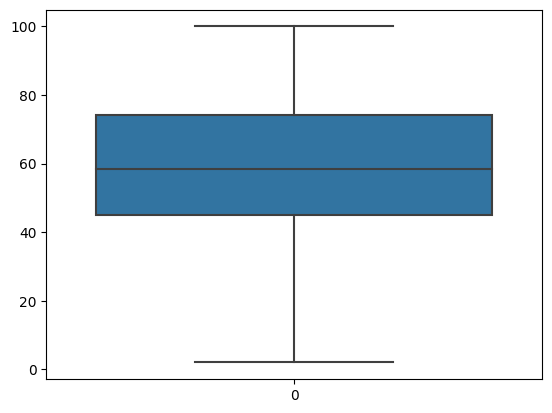

In [9]:
sns.boxplot(df['Physics'])

<Axes: >

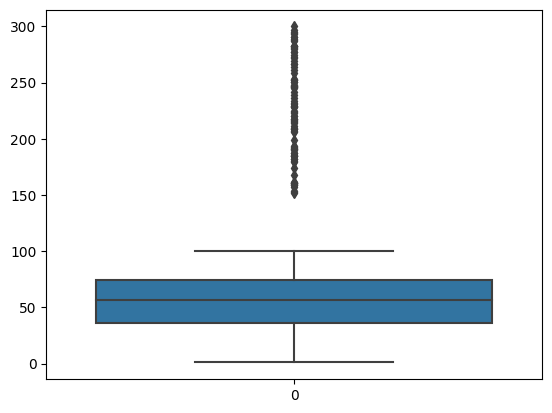

In [10]:
sns.boxplot(df['Chemistry'])

<Axes: >

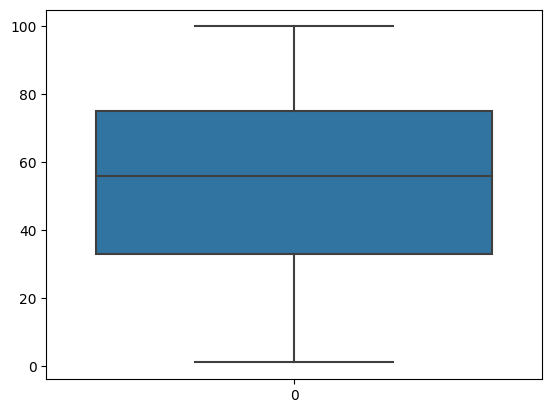

In [11]:
sns.boxplot(df['Mathematics'])

<Axes: >

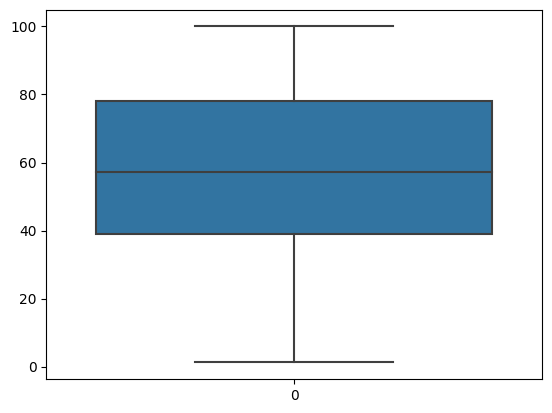

In [12]:
sns.boxplot(df['AI'])

From above boxplot we can see that we have outlier for only Chemistry Subject

# Treating Outliers of Chemistry using IQR

In [15]:
Q1 = np.percentile(df['Chemistry'], 25, interpolation='midpoint')
Q2 = np.percentile(df['Chemistry'], 75, interpolation = 'midpoint')
IQR = Q2-Q1

print("Old shape of Dataset : {}".format(df.shape))

#Upper Bound
upper = np.where(df['Chemistry'] >= (Q2+ 1.5*IQR))

#lowerr Bound
lower = np.where(df['Chemistry'] <= (Q1-1.5*IQR))

df.drop(upper[0],inplace=True)
df.drop(lower[0],inplace=True)

print("New shape of dataset :{}".format(df.shape))

Old shape of Dataset : (784, 9)
New shape of dataset :(689, 9)


<ipython-input-15-faca12b6f361>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['Chemistry'], 25, interpolation='midpoint')
<ipython-input-15-faca12b6f361>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2 = np.percentile(df['Chemistry'], 75, interpolation = 'midpoint')


**Checking once if there any outlier left**

<Axes: >

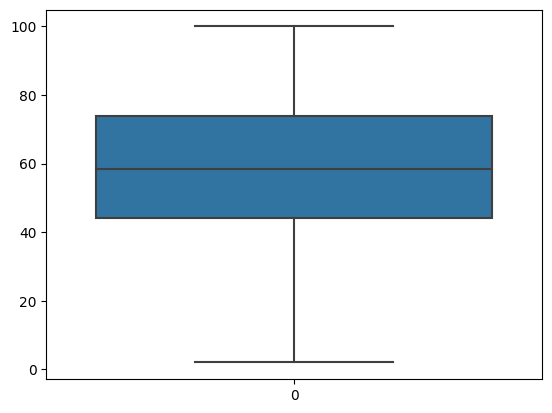

In [17]:
sns.boxplot(df['Physics'])

<Axes: >

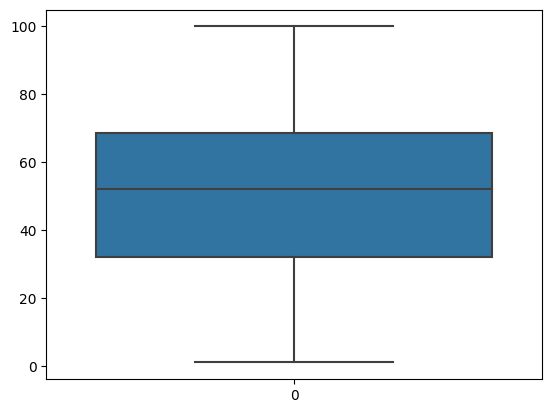

In [18]:
sns.boxplot(df['Chemistry'])

<Axes: >

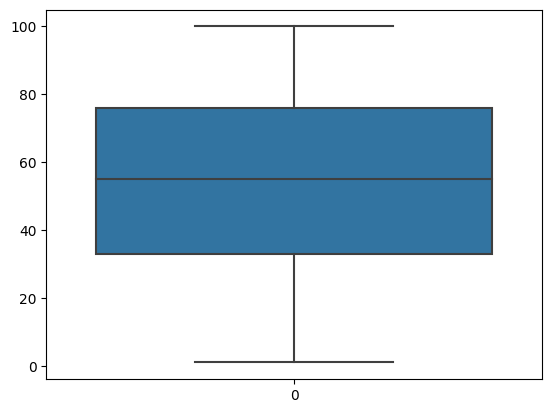

In [19]:
sns.boxplot(df['Mathematics'])

<Axes: >

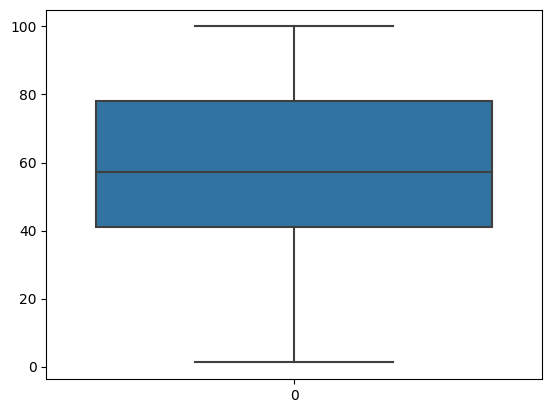

In [20]:
sns.boxplot(df['AI'])

# **Data Transformation**

In [28]:
import locale

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 689 entries, 0 to 783
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    689 non-null    int64  
 1   Student Name  689 non-null    object 
 2   Department    689 non-null    object 
 3   Physics       689 non-null    float64
 4   Mathematics   689 non-null    float64
 5   Chemistry     689 non-null    float64
 6   AI            689 non-null    float64
 7   Term Work     689 non-null    int64  
 8   DOB           689 non-null    object 
dtypes: float64(4), int64(2), object(3)
memory usage: 70.0+ KB


In [23]:


df['DOB'] = pd.to_datetime(df['DOB'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 689 entries, 0 to 783
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    689 non-null    int64         
 1   Student Name  689 non-null    object        
 2   Department    689 non-null    object        
 3   Physics       689 non-null    float64       
 4   Mathematics   689 non-null    float64       
 5   Chemistry     689 non-null    float64       
 6   AI            689 non-null    float64       
 7   Term Work     689 non-null    int64         
 8   DOB           689 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 70.0+ KB


In [32]:
df['Birth_Year'] = df['DOB'].dt.year         
df['Birth_months'] = df['DOB'].dt.month      


In [33]:
df

,Unnamed: 0,Student Name,Department,Physics,Mathematics,Chemistry,AI,Term Work,DOB,Birth_Year,Birth_months
0,0,Theresa Blue,COMPUTER,62.000000,4.000000,64.1,74.0,8,2003-02-19,2003,2
3,3,Diane Griffin,ENTC,58.000000,69.000000,53.0,21.6,7,2001-04-05,2001,4
6,6,Darnell Arredondo,COMPUTER,72.000000,30.000000,20.0,19.1,10,2003-05-14,2003,5
7,7,Twyla Brown,COMPUTER,47.000000,46.600000,61.6,85.0,9,2003-04-03,2003,4
8,8,Fernando Lai,COMPUTER,58.491852,4.000000,68.2,33.2,2,2002-03-28,2002,3
...,...,...,...,...,...,...,...,...,...,...,...
777,777,Michelle Brown,COMPUTER,58.491852,55.071655,37.0,27.1,3,2002-02-03,2002,2
779,779,Melinda Haynes,COMPUTER,2.000000,92.000000,42.0,3.8,1,2003-09-03,2003,9
781,781,Joyce Eck,MECHANICAL,58.491852,92.000000,72.7,48.0,1,2002-03-05,2002,3
782,782,Travis Spenser,ENTC,85.000000,86.000000,88.0,78.0,6,2002-04-04,2002,4
